In [3]:
# Import relavant libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [4]:
filename = 'tss.csv'
df = pd.read_csv(filename)
df.head() 

,Sample,Initial,Final
0,1,1.3395,1.3656
1,2,1.0771,1.0791
2,3,1.0826,1.0849
3,4,1.0933,1.0962
4,5,1.0848,1.0866


In [5]:
filename = 'Filter_Map.csv'
fmap = pd.read_csv(filename)
fmap.head() 

,Sample,Volume,Description,Tube,Position
0,25,24.0,Initial Rinse,6,--
1,20,22.0,Initial Rinse,7,--
2,11,25.0,Initial Rinse,8,--
3,17,21.5,Initial Rinse,9,--
4,10,21.0,Initial Rinse,10,--


In [6]:
df2=pd.merge(df,fmap,how='left', on='Sample')

In [7]:
df2.head()

,Sample,Initial,Final,Volume,Description,Tube,Position
0,1,1.3395,1.3656,53.0,Final Rinse,9,--
1,2,1.0771,1.0791,150.0,Whole Sample,8,Top
2,3,1.0826,1.0849,150.0,Whole Sample,9,Top
3,4,1.0933,1.0962,152.0,Whole Sample,6,Bottom
4,5,1.0848,1.0866,150.0,Initial Sample,10,Bottom


In [8]:
df2['Conc']=(df2['Final']-df2['Initial'])/df2['Volume']

In [9]:
#Set up definitions to extract difference between top and bottom
def des(dd,description):
    df_type=dd[dd['Description']==description]
    return df_type;  
def tube(dd,description,number):
    df_type=des(dd,description)
    exp_u=df_type[df_type['Tube']==number]
    return exp_u;
def diff(dd,description,number):
    exp_u=tube(dd,description,number)
    top=exp_u[exp_u['Position']=='Top']
    bottom=exp_u[exp_u['Position']=='Bottom']
    red=bottom.iloc[0].Conc-top.iloc[0].Conc
    return red

In [10]:
w3=diff(df2,'Whole Sample',9)
print(w3)

-3.3333333333329666e-06


In [11]:
df_filt=pd.DataFrame({'Tube': [6,7,8,9,10]})

In [12]:
def chart(dd,Description):
    df_filt[Description]=[diff(df2,Description, 6),diff(df2,Description, 7),diff(df2,Description, 8),diff(df2,Description, 9),diff(df2,Description, 10),]
    return df_filt

In [13]:
xs=chart(df2,'Whole Sample')

In [14]:
xs=chart(df2,'Initial Sample')

In [15]:
xs

,Tube,Whole Sample,Initial Sample
0,6,5.263158e-06,2.631579e-06
1,7,-6.330810e-06,3.937360e-06
2,8,-2.666667e-06,-2.751206e-06
3,9,-3.333333e-06,9.357263e-07
4,10,7.593819e-07,1.578947e-07


Text(0.5, 0, 'tubes')

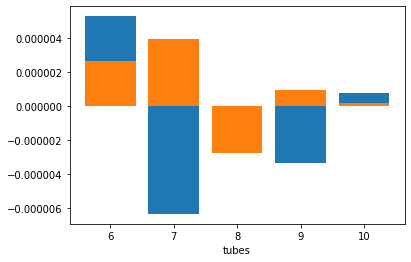

In [18]:
plt.bar(xs['Tube'],xs['Whole Sample'])
plt.bar(xs['Tube'],xs['Initial Sample'])
plt.xlabel('tubes')
